In [4]:
import pandas as pd
import numpy as np
from pathlib import Path
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [5]:


df = pd.read_csv("../data/Final Dataset - State of Data 2024 - Kaggle - df_survey_2024.csv")


print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Columns: 403 entries, 0.a_token to 8.d.12_Treinando e aplicando LLM's para solucionar problemas de negócio.
dtypes: bool(1), float64(323), int64(1), object(78)
memory usage: 16.0+ MB
None


In [6]:
# Configurar caminhos
caminho_csv = Path("../data/Final Dataset - State of Data 2024 - Kaggle - df_survey_2024.csv")
caminho_pasta_data = caminho_csv.parent
nome_arquivo_excel = "analise_completa_colunas.xlsx"
caminho_excel = caminho_pasta_data / nome_arquivo_excel

# Verificar/instalar dependências
try:
    import openpyxl
except ImportError:
    print("Instalando openpyxl...")
    import subprocess
    subprocess.check_call(["pip", "install", "openpyxl"])
    import openpyxl

# Configurações do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

try:
    # Carregar dados
    df = pd.read_csv(caminho_csv)
    
    # Criar análise
    col_info = pd.DataFrame({
        'Coluna': df.columns,
        'Tipo': df.dtypes,
        'Nulos': df.isna().sum(),
        '% Nulos': (df.isna().mean() * 100).round(2),
        'Valores Únicos': df.nunique(),
        'Primeiro Valor': df.iloc[0]
    })
    
    # Exibir informações
    print("="*100)
    print("ANÁLISE COMPLETA DAS COLUNAS")
    print("="*100)
    with pd.option_context('display.max_rows', None):
        print(col_info)
    
    # Salvar na mesma pasta do CSV
    col_info.to_excel(caminho_excel, index=False, engine='openpyxl')
    print(f"\nRelatório salvo em: {caminho_excel}")
    
    # Análise adicional
    print("\n" + "="*100)
    print("DADOS ESTATÍSTICOS")
    print("="*100)
    print(f"Total de colunas: {len(df.columns)}")
    print(f"Total de linhas: {len(df)}")
    print("\nDistribuição de tipos:")
    print(df.dtypes.value_counts())

except FileNotFoundError:
    print(f"\nERRO: Arquivo não encontrado em: {caminho_csv}")
    print("Verifique se o caminho está correto e se o arquivo existe")

except Exception as e:
    print(f"\nERRO: {str(e)}")

Instalando openpyxl...


ModuleNotFoundError: No module named 'openpyxl'

In [ ]:
# Seleção e renomeação de colunas do Bloco 1: Perfil Pessoal e Educacional
df_perfil = df[
    [
        '1.a_idade',
        '1.a.1_faixa_idade',
        '1.b_genero',
        '1.c_cor/raca/etnia',
        '1.d_pcd',
        '1.m_área_de_formação',
        '1.i_estado_onde_mora'
    ]
].rename(columns={
    '1.a_idade': 'idade',
    '1.a.1_faixa_idade': 'faixa_idade',
    '1.b_genero': 'genero',
    '1.c_cor/raca/etnia': 'raca',
    '1.d_pcd': 'pcd',
    '1.m_área_de_formação': 'formacao',
    '1.i_estado_onde_mora': 'estado'
})

# Exibir as primeiras linhas para ver como ficou
df_perfil.head()


,idade,faixa_idade,genero,raca,pcd,formacao,estado
0,18,17-21,Masculino,Branca,Não,Computação / Engenharia de Software / Sistemas de Informação/ TI,Rio Grande do Sul (RS)
1,18,17-21,Masculino,Branca,Não,Computação / Engenharia de Software / Sistemas de Informação/ TI,Santa Catarina (SC)
2,18,17-21,Masculino,Parda,Não,Computação / Engenharia de Software / Sistemas de Informação/ TI,São Paulo (SP)
3,18,17-21,Masculino,Branca,Não,Computação / Engenharia de Software / Sistemas de Informação/ TI,São Paulo (SP)
4,18,17-21,Masculino,Branca,Não,Computação / Engenharia de Software / Sistemas de Informação/ TI,São Paulo (SP)


In [ ]:

# Limpeza e Padronização dos Dados do Bloco 1


# Verificar valores nulos
print("Valores nulos antes da limpeza:")
print(df_perfil.isnull().sum())

# Padronizar Gênero
genero_map = {
    'Masculino': 'Masculino',
    'masculino': 'Masculino',
    'Feminino': 'Feminino',
    'feminino': 'Feminino',
    'Não binário': 'Não binário',
    'Outro': 'Outro',
    'Prefiro não dizer': 'Não informado',
    'Prefiro não responder': 'Não informado',
    '': 'Não informado',
    None: 'Não informado'
}
df_perfil['genero'] = df_perfil['genero'].map(genero_map).fillna('Não informado')

# Padronizar Raça
raca_map = {
    'Branca': 'Branca',
    'Preta': 'Preta',
    'Parda': 'Parda',
    'Amarela': 'Amarela',
    'Indígena': 'Indígena',
    'Outro': 'Outro',
    'Prefiro não dizer': 'Não informado',
    '': 'Não informado',
    None: 'Não informado'
}
df_perfil['raca'] = df_perfil['raca'].map(raca_map).fillna('Não informado')

# Padronizar PCD
pcd_map = {
    'Sim': 'Sim',
    'Não': 'Não',
    'Prefiro não dizer': 'Não informado',
    '': 'Não informado',
    None: 'Não informado'
}
df_perfil['pcd'] = df_perfil['pcd'].map(pcd_map).fillna('Não informado')

# Padronizar Formação Acadêmica

df_perfil['formacao'] = df_perfil['formacao'].fillna('Não informado').replace('', 'Não informado')



# Padronizar Estado 
# Aqui apenas preencher nulos com 'Não informado' caso existam
df_perfil['estado'] = df_perfil['estado'].fillna('Não informado')

# Converter idade em número
df_perfil['idade'] = pd.to_numeric(df_perfil['idade'], errors='coerce')

# Revisar novamente os nulos
print("\nValores nulos após a limpeza:")
print(df_perfil.isnull().sum())

# Exibir primeiras linhas conferindo
df_perfil.head()


Valores nulos antes da limpeza:
idade            0
faixa_idade      0
genero           0
raca             0
pcd              0
formacao        94
estado         139
dtype: int64

Valores nulos após a limpeza:
idade          0
faixa_idade    0
genero         0
raca           0
pcd            0
formacao       0
estado         0
dtype: int64


,idade,faixa_idade,genero,raca,pcd,formacao,estado
0,18,17-21,Masculino,Branca,Não,Computação / Engenharia de Software / Sistemas de Informação/ TI,Rio Grande do Sul (RS)
1,18,17-21,Masculino,Branca,Não,Computação / Engenharia de Software / Sistemas de Informação/ TI,Santa Catarina (SC)
2,18,17-21,Masculino,Parda,Não,Computação / Engenharia de Software / Sistemas de Informação/ TI,São Paulo (SP)
3,18,17-21,Masculino,Branca,Não,Computação / Engenharia de Software / Sistemas de Informação/ TI,São Paulo (SP)
4,18,17-21,Masculino,Branca,Não,Computação / Engenharia de Software / Sistemas de Informação/ TI,São Paulo (SP)


In [ ]:
# Agrupamento Inteligente da Formação Acadêmica

def agrupar_formacao(valor):
    if pd.isna(valor) or valor in ['', 'Não informado', 'Prefiro não dizer']:
        return 'Não informado'
    
    v = valor.lower()
    
    if 'computação' in v or 'informação' in v or 'sistemas' in v or 'tecnologia' in v or 'análise e desenvolvimento' in v:
        return 'Computação/TI'
    
    if 'estatística' in v or 'matemática' in v:
        return 'Estatística/Matemática'
    
    if 'engenharia' in v:
        return 'Engenharias'
    
    if 'administração' in v or 'economia' in v:
        return 'Administração/Economia'
    
    if 'sociologia' in v or 'psicologia' in v or 'pedagogia' in v or 'ciências sociais' in v or 'ciência política' in v:
        return 'Ciências Sociais/Humanas'
    
    if 'medicina' in v or 'biologia' in v or 'farmácia' in v or 'enfermagem' in v:
        return 'Saúde/Biológicas'
    
    return 'Outra Formação'

# Aplicar função
df_perfil['formacao_macro'] = df_perfil['formacao'].apply(agrupar_formacao)

# Conferir distribuição
print("\nDistribuição após agrupamento:")
print(df_perfil['formacao_macro'].value_counts())

# Visualizar primeiras linhas
df_perfil[['formacao', 'formacao_macro']].head()



Distribuição após agrupamento:
formacao_macro
Computação/TI               2076
Engenharias                 1062
Administração/Economia       779
Estatística/Matemática       477
Outra Formação               412
Ciências Sociais/Humanas     181
Saúde/Biológicas             136
Não informado                 94
Name: count, dtype: int64


,formacao,formacao_macro
0,Computação / Engenharia de Software / Sistemas de Informação/ TI,Computação/TI
1,Computação / Engenharia de Software / Sistemas de Informação/ TI,Computação/TI
2,Computação / Engenharia de Software / Sistemas de Informação/ TI,Computação/TI
3,Computação / Engenharia de Software / Sistemas de Informação/ TI,Computação/TI
4,Computação / Engenharia de Software / Sistemas de Informação/ TI,Computação/TI


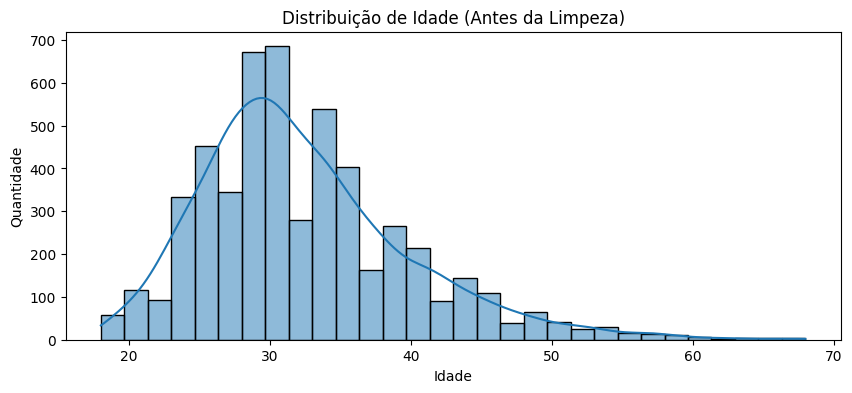


Estatísticas descritivas:
count    5217.000000
mean       32.358827
std         7.419433
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        68.000000
Name: idade, dtype: float64

Quantidade de outliers detectados: 0


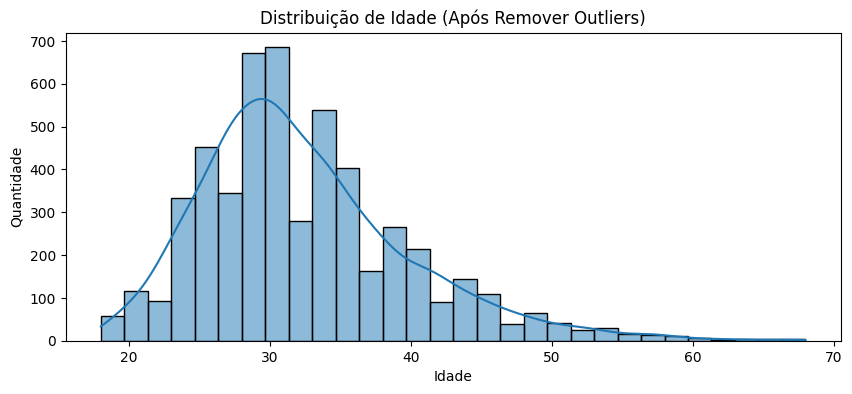


Estatísticas após limpeza:
count    5217.000000
mean       32.358827
std         7.419433
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        68.000000
Name: idade, dtype: float64


In [ ]:
# Análise e Tratamento de Outliers de Idade

# Ver distribuição geral
plt.figure(figsize=(10, 4))
sns.histplot(df_perfil['idade'], bins=30, kde=True)
plt.title('Distribuição de Idade (Antes da Limpeza)')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

# Ver estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df_perfil['idade'].describe())

# Definir limites plausíveis
idade_min = 15
idade_max = 90

# Contar quantos outliers existem
outliers = df_perfil[(df_perfil['idade'] < idade_min) | (df_perfil['idade'] > idade_max)]
print(f"\nQuantidade de outliers detectados: {len(outliers)}")

# Filtrar idades fora dos limites
df_perfil.loc[(df_perfil['idade'] < idade_min) | (df_perfil['idade'] > idade_max), 'idade'] = None

# Conferir novamente
plt.figure(figsize=(10, 4))
sns.histplot(df_perfil['idade'], bins=30, kde=True)
plt.title('Distribuição de Idade (Após Remover Outliers)')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

print("\nEstatísticas após limpeza:")
print(df_perfil['idade'].describe())


In [ ]:
fig = px.histogram(
    df_perfil,
    x="pcd",
    color="pcd",
    title="Distribuição Geral de Pessoas com Deficiência (PCD)",
    text_auto=True,
    labels={"pcd": "Situação PCD", "count": "Número de Respondentes"}
)

fig.update_layout(
    bargap=0.3,
    showlegend=False,
    template="plotly_white",
    xaxis_title="Situação PCD",
    yaxis_title="Quantidade de Respondentes"
)

fig.show()

In [ ]:
# Distribuição por Gênero com Plotly Express

fig = px.histogram(
    df_perfil,
    x="genero",
    color="genero",
    title="Distribuição por Gênero",
    labels={"genero": "Gênero"},
    text_auto=True
)

fig.update_layout(
    xaxis_title="Gênero",
    yaxis_title="Quantidade de Respondentes",
    showlegend=False,
    bargap=0.2
)

fig.show()


In [ ]:
# Distribuição por Raça/Cor

fig = px.histogram(
    df_perfil,
    x="raca",
    color="raca",
    title="Distribuição de Respondentes por Raça/Cor",
    labels={"raca": "Raça/Cor", "count": "Número de Respondentes"},
    text_auto=True
)

fig.update_layout(
    xaxis_title="Raça/Cor",
    yaxis_title="Quantidade de Respondentes",
    title_font_size=20,
    bargap=0.3,
    showlegend=False,
    template="plotly_white"
)

fig.show()


In [ ]:
# Distribuição por Formação Acadêmica (Agrupada)

fig = px.histogram(
    df_perfil,
    x="formacao_macro",
    color="formacao_macro",
    title="Distribuição por Área de Formação Acadêmica (Agrupada)",
    labels={"formacao_macro": "Área de Formação (Macro)", "count": "Número de Respondentes"},
    text_auto=True
)

fig.update_layout(
    xaxis_title="Área de Formação (Macro)",
    yaxis_title="Quantidade de Respondentes",
    title_font_size=20,
    bargap=0.3,
    showlegend=False,
    template="plotly_white",
)

fig.show()


In [ ]:
# Distribuição por Estado (UF)


# Criar um dicionário com o nome completo → sigla (poderia ser carregado de uma fonte externa também)
siglas_estados = {
    'Acre (AC)': 'AC', 'Alagoas (AL)': 'AL', 'Amapá (AP)': 'AP', 'Amazonas (AM)': 'AM', 'Bahia (BA)': 'BA',
    'Ceará (CE)': 'CE', 'Distrito Federal (DF)': 'DF', 'Espírito Santo (ES)': 'ES', 'Goiás (GO)': 'GO',
    'Maranhão (MA)': 'MA', 'Mato Grosso (MT)': 'MT', 'Mato Grosso do Sul (MS)': 'MS', 'Minas Gerais (MG)': 'MG',
    'Pará (PA)': 'PA', 'Paraíba (PB)': 'PB', 'Paraná (PR)': 'PR', 'Pernambuco (PE)': 'PE', 'Piauí (PI)': 'PI',
    'Rio de Janeiro (RJ)': 'RJ', 'Rio Grande do Norte (RN)': 'RN', 'Rio Grande do Sul (RS)': 'RS',
    'Rondônia (RO)': 'RO', 'Roraima (RR)': 'RR', 'Santa Catarina (SC)': 'SC', 'São Paulo (SP)': 'SP',
    'Sergipe (SE)': 'SE', 'Tocantins (TO)': 'TO'
}

# Aplicar as siglas ao DataFrame
df_perfil['estado_sigla'] = df_perfil['estado'].map(siglas_estados).fillna(df_perfil['estado'])

# Gerar o gráfico com as siglas
fig = px.histogram(
    df_perfil,
    x="estado_sigla",
    color="estado_sigla",
    title="Distribuição Geográfica por Estado (Siglas)",
    labels={"estado_sigla": "Estado", "count": "Número de Respondentes"},
    text_auto=True
)

# texto acima das barras
fig.update_traces(textposition='outside')  # Força texto sempre fora da barra

fig.update_layout(
    xaxis_title="Estado (Sigla)",
    yaxis_title="Quantidade de Respondentes",
    title_font_size=20,
    bargap=0.3,
    showlegend=False,
    template="plotly_white"
)

fig.show()



In [ ]:
# Gênero X Formação Acadêmica (Agrupada)

# Calcular o máximo de contagem por grupo para definir o limite do eixo Y
counts = df_perfil.groupby(["formacao_macro", "genero"]).size().reset_index(name='count')
y_max = counts['count'].max()

# Gráfico
fig = px.histogram(
    df_perfil,
    x="formacao_macro",
    color="genero",
    barmode="group",
    title="Distribuição por Área de Formação Acadêmica (Agrupada) por Gênero",
    labels={"formacao_macro": "Área de Formação (Macro)", "genero": "Gênero", "count": "Número de Respondentes"},
    text_auto=True
)

# Forçar os textos fora da barra
fig.update_traces(textposition='outside')

# Layout com margem de segurança no eixo Y
fig.update_layout(
    xaxis_title="Área de Formação (Macro)",
    yaxis_title="Quantidade de Respondentes",
    title_font_size=20,
    bargap=0.2,
    template="plotly_white",
    yaxis=dict(range=[0, y_max * 1.2])
)

fig.show()



In [ ]:
# Raça x Formação Acadêmica (Agrupada)
fig = px.histogram(
    df_perfil,
    x="formacao_macro",
    color="raca",
    barmode="group",
    title="Distribuição por Área de Formação Acadêmica (Agrupada) por Raça/Cor",
    labels={"formacao_macro": "Área de Formação (Macro)", "raca": "Raça/Cor", "count": "Número de Respondentes"},
    text_auto=True
)

fig.update_layout(
    width=1800,  # aumenta a largura da figura
    height=600,
    xaxis_title="Área de Formação (Macro)",
    yaxis_title="Quantidade de Respondentes",
    title_font_size=20,
    bargap=0.2,
    template="plotly_white",
    margin=dict(l=40, r=40, t=80, b=200),
)

fig.update_traces(
    textposition='outside'
)

fig.show()


# Bloco 6

In [ ]:
# Selecionar colunas do Bloco 6 (rotina e atividades)
colunas_bloco6 = (
    ['6.a_rotina_como_de'] +
    [f'6.a.{i}' for i in range(1, 10)] +
    ['6.h_maior_tempo_gasto_como_de'] +
    [f'6.h.{i}' for i in range(1, 10)]
)

# Verificar quais colunas existem (às vezes faltam no CSV)
colunas_existentes = [col for col in colunas_bloco6 if col in df.columns]

# Criar df somente com essas colunas
df_eng_dados = df[colunas_existentes].copy()

# Unir com df_perfil (Bloco 1)
df_eng_dados_completo = pd.concat([df_perfil, df_eng_dados], axis=1)

# Filtrar quem realmente respondeu a seção de Engenharia de Dados
df_engativos = df_eng_dados_completo[df_eng_dados_completo['6.a_rotina_como_de'].notna()]

# Adicionar print informativo
print(f"Total de engenheiros de dados identificados: {len(df_engativos)}")


Total de engenheiros de dados identificados: 929


In [ ]:
fig = px.histogram(
    df_engativos,
    x="formacao_macro",
    color="formacao_macro",
    title="Engenharia de Dados: Formação Acadêmica dos Profissionais",
    text_auto=True
)
fig.update_layout(bargap=0.2, showlegend=False)
fig.show()


In [ ]:
fig = px.histogram(
    df_engativos,
    x="genero",
    color="genero",
    title="👥 Gênero dos Profissionais de Engenharia de Dados",
    text_auto=True,
    labels={"genero": "Gênero", "count": "Número de Respondentes"}
)

fig.update_layout(
    bargap=0.2,
    showlegend=False,
    template="plotly_white",
    xaxis_title="Gênero",
    yaxis_title="Quantidade de Respondentes"
)

fig.show()


In [ ]:
fig = px.histogram(
    df_engativos,
    x="faixa_idade",
    color="faixa_idade",
    title="📊 Faixa Etária dos Engenheiros de Dados",
    text_auto=True,
    labels={"faixa_idade": "Faixa Etária", "count": "Número de Respondentes"}
)

fig.update_layout(
    bargap=0.15,
    showlegend=False,
    template="plotly_white",
    xaxis_title="Faixa Etária",
    yaxis_title="Quantidade de Respondentes"
)

fig.show()


In [ ]:
# Contagem máxima para ajustar o eixo y
counts_raca = df_engativos.groupby("raca").size().reset_index(name="count")
y_max = counts_raca["count"].max()

fig = px.histogram(
    df_engativos,
    x="raca",
    color="raca",
    barmode="group",
    title="Distribuição de Raça/Cor entre Engenheiros de Dados",
    labels={
        "raca": "Raça/Cor",
        "count": "Número de Respondentes"
    },
    text_auto=True
)

fig.update_traces(
    textposition='outside'
)

fig.update_layout(
    xaxis_title="Raça/Cor",
    yaxis_title="Quantidade de Respondentes",
    title_font_size=20,
    bargap=0.2,
    template="plotly_white",
    showlegend=False,
    yaxis=dict(range=[0, y_max * 1.2])
)

fig.show()

In [ ]:


# Lista correta das colunas do bloco 6.h
colunas_atividades = [
    '6.h.1_Desenvolvendo pipelines de dados utilizando linguagens de programação como Python, Scala, Java etc.',
    '6.h.2_Realizando construções de ETL\\s em ferramentas como Pentaho, Talend, Dataflow etc.',
    '6.h.3_Criando consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio.',
    '6.h.4_Atuando na integração de diferentes fontes de dados através de plataformas proprietárias como Stitch Data, Fivetran etc.',
    '6.h.5_Modelando soluções de arquitetura de dados, criando componentes de ingestão de dados, transformação e recuperação da informação.',
    '6.h.6_Desenvolvendo/cuidando da manutenção de repositórios de dados baseados em streaming de eventos como Data Lakes e Data Lakehouses.',
    '6.h.7_Atuando na modelagem dos dados, com o objetivo de criar conjuntos de dados como Data Warehouses, Data Marts, Datasets etc.',
    '6.h.8_Cuidando da qualidade dos dados, metadados e dicionário de dados.',
    '6.h.9_Nenhuma das opções listadas refletem meu dia a dia.'
]

# Contar quantos responderam "1" (ou True) para cada atividade
contagens = []
for col in colunas_atividades:
    if df[col].dtype == object:
        contagem = df[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim']).sum()
    else:
        contagem = df[col].fillna(0).astype(int).sum()
    contagens.append((col.split('_', 1)[1], contagem))  # usar só o texto da pergunta

# Criar DataFrame com os dados
df_atividades = pd.DataFrame(contagens, columns=["Atividade", "Frequência"]).sort_values(by="Frequência", ascending=True)

# Gerar gráfico
fig = px.bar(
    df_atividades,
    x="Frequência",
    y="Atividade",
    orientation="h",
    title="🔧 Atividades Mais Frequentes na Engenharia de Dados (Respostas Múltiplas)",
    text_auto=True
)

fig.update_layout(
    template="plotly_white",
    height=700,
    xaxis_title="Quantidade de Seleções",
    yaxis_title="Atividade"
)

fig.show()



In [ ]:


# Lista de atividades
colunas_atividades = [
    '6.h.1_Desenvolvendo pipelines de dados utilizando linguagens de programação como Python, Scala, Java etc.',
    '6.h.2_Realizando construções de ETL\\s em ferramentas como Pentaho, Talend, Dataflow etc.',
    '6.h.3_Criando consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio.',
    '6.h.4_Atuando na integração de diferentes fontes de dados através de plataformas proprietárias como Stitch Data, Fivetran etc.',
    '6.h.5_Modelando soluções de arquitetura de dados, criando componentes de ingestão de dados, transformação e recuperação da informação.',
    '6.h.6_Desenvolvendo/cuidando da manutenção de repositórios de dados baseados em streaming de eventos como Data Lakes e Data Lakehouses.',
    '6.h.7_Atuando na modelagem dos dados, com o objetivo de criar conjuntos de dados como Data Warehouses, Data Marts, Datasets etc.',
    '6.h.8_Cuidando da qualidade dos dados, metadados e dicionário de dados.',
    '6.h.9_Nenhuma das opções listadas refletem meu dia a dia.'
]

# Filtrar DataFrame
df_engativos = df[df['6.a_rotina_como_de'].notna()].copy()

# Gerar contagens
dados_explodidos = []
for col in colunas_atividades:
    col_nome = col.split("_", 1)[1]
    for faixa in df_engativos['1.a.1_faixa_idade'].dropna().unique():
        contagem = df_engativos[
            (df_engativos[col] == 1) &
            (df_engativos['1.a.1_faixa_idade'] == faixa)
        ].shape[0]
        dados_explodidos.append({
            "Atividade": col_nome,
            "Faixa Etária": faixa,
            "Frequência": contagem
        })

# Criar DataFrame final
df_ativ_faixa = pd.DataFrame(dados_explodidos)

# Conferir que agora há frequências diferentes de zero
print(df_ativ_faixa)

# Gráfico
# Pivotar
heatmap_data = df_ativ_faixa.pivot_table(
    index="Atividade",
    columns="Faixa Etária",
    values="Frequência",
    fill_value=0
).reset_index()

# Gerar heatmap
fig = px.imshow(
    heatmap_data.set_index("Atividade"),
    labels=dict(color="Quantidade"),
    color_continuous_scale="Blues",
    aspect="auto",
    title="🔧 Distribuição de Atividades por Faixa Etária (Heatmap)"
)

fig.update_layout(
    xaxis_title="Faixa Etária",
    yaxis_title="Atividade",
    height=800
)

fig.show()



                                                                                              Atividade Faixa Etária  Frequência
0   Desenvolvendo pipelines de dados utilizando linguagens de programação como Python, Scala, Java etc.        17-21          16
1   Desenvolvendo pipelines de dados utilizando linguagens de programação como Python, Scala, Java etc.        22-24          49
2   Desenvolvendo pipelines de dados utilizando linguagens de programação como Python, Scala, Java etc.        25-29         185
3   Desenvolvendo pipelines de dados utilizando linguagens de programação como Python, Scala, Java etc.        30-34         154
4   Desenvolvendo pipelines de dados utilizando linguagens de programação como Python, Scala, Java etc.        35-39          84
..                                                                                                  ...          ...         ...
76                                                  Nenhuma das opções listadas refletem meu dia 

# Bloco 6b

In [ ]:
# Verificar colunas relacionadas ao bloco 6.b
colunas_6b = [col for col in df.columns if col.startswith("6.b.")]
print(f"Total de colunas no Bloco 6.b: {len(colunas_6b)}")
print("Exemplo de colunas:\n", colunas_6b[:5])

Total de colunas no Bloco 6.b: 21
Exemplo de colunas:
 ['6.b.1_Scripts Python', '6.b.2_SQL & Stored Procedures', '6.b.3_Apache Airflow', '6.b.4_Apache NiFi', '6.b.5_Luigi']


In [ ]:
# Filtrar apenas respondentes que participaram do bloco 6
df_engativos = df[df["6.a_rotina_como_de"].notna()].copy()

# Contar o uso de cada ferramenta
contagens_6b = []
for col in colunas_6b:
    if df_engativos[col].dtype == object:
        contagem = df_engativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim']).sum()
    else:
        contagem = df_engativos[col].fillna(0).astype(int).sum()
    contagens_6b.append((col.split("_", 1)[1], contagem))

# Criar DataFrame de frequência
df_ferramentas_6b = pd.DataFrame(contagens_6b, columns=["Ferramenta", "Frequência"]).sort_values(by="Frequência", ascending=True)

# Visualizar
df_ferramentas_6b

,Ferramenta,Frequência
4,Luigi,1
9,Stitch,7
14,SAP BW ETL,8
6,Talend,9
13,IBM DataStage,10
18,Knime,10
16,SAS Data Integration,14
8,Alteryx,14
20,Não utilizo ferramentas de ETL,14
17,Qlik Sense,14


In [ ]:

# Gráfico de barras horizontal
fig = px.bar(
    df_ferramentas_6b,
    x="Frequência",
    y="Ferramenta",
    orientation="h",
    title="🛠️ Ferramentas Mais Utilizadas por Profissionais de Engenharia de Dados (Bloco 6.b)",
    text_auto=True
)

fig.update_layout(
    template="plotly_white",
    height=700,
    xaxis_title="Quantidade de Seleções",
    yaxis_title="Ferramenta"
)

fig.show()

In [ ]:
# Construir DataFrame cruzando ferramenta com faixa etária
dados_explodidos_6b = []

for col in colunas_6b:
    nome_ferramenta = col.split("_", 1)[1]
    for faixa in df_engativos['1.a.1_faixa_idade'].dropna().unique():
        contagem = df_engativos[
            (df_engativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim', '1.0'])) &
            (df_engativos['1.a.1_faixa_idade'] == faixa)
        ].shape[0]
        dados_explodidos_6b.append({
            "Ferramenta": nome_ferramenta,
            "Faixa Etária": faixa,
            "Frequência": contagem
        })

# Criar DataFrame
df_ferramenta_faixa = pd.DataFrame(dados_explodidos_6b)

In [ ]:


# Pivotar os dados para formato de matriz
heatmap_6b = df_ferramenta_faixa.pivot_table(
    index="Ferramenta",
    columns="Faixa Etária",
    values="Frequência",
    fill_value=0
).reset_index()

# Gerar heatmap com Plotly
fig = px.imshow(
    heatmap_6b.set_index("Ferramenta"),
    labels=dict(color="Qtd de Seleções"),
    color_continuous_scale="Blues",
    aspect="auto",
    title=" Ferramentas de Engenharia de Dados por Faixa Etária (Bloco 6.b)"
)

fig.update_layout(
    xaxis_title="Faixa Etária",
    yaxis_title="Ferramenta",
    height=800
)

fig.show()


# Bloco 7

In [ ]:
# Confirme que df e df_perfil estão carregados e prontos

# Selecionar colunas do Bloco 7
colunas_bloco7 = (
    ['7.a_rotina_como_da'] +
    [f'7.a.{i}' for i in range(1, 11)]
)

# Verificar quais colunas existem
colunas_existentes = [col for col in colunas_bloco7 if col in df.columns]

# Criar DataFrame com essas colunas
df_da = df[colunas_existentes].copy()

# Unir com perfil
df_da_completo = pd.concat([df_perfil, df_da], axis=1)

# Filtrar respondentes
df_da_ativos = df_da_completo[df_da_completo['7.a_rotina_como_da'].notna()]

print(f"Total de profissionais de Data Analysis identificados: {len(df_da_ativos)}")



Total de profissionais de Data Analysis identificados: 1669


In [ ]:
# Faixa etária
fig = px.histogram(
    df_da_ativos,
    x="faixa_idade",
    color="faixa_idade",
    title="Faixa Etária dos Profissionais de Data Analysis",
    text_auto=True,
    labels={"faixa_idade": "Faixa Etária", "count": "Número de Respondentes"}
)
fig.update_layout(bargap=0.2, showlegend=False)
fig.show()

In [ ]:
# Gênero
fig = px.histogram(
    df_da_ativos,
    x="genero",
    color="genero",
    title="Gênero dos Profissionais de Data Analysis",
    text_auto=True,
    labels={"genero": "Gênero", "count": "Número de Respondentes"}
)
fig.update_layout(bargap=0.2, showlegend=False)
fig.show()

In [ ]:
# Formação
fig = px.histogram(
    df_da_ativos,
    x="formacao_macro",
    color="formacao_macro",
    title="Formação Acadêmica dos Profissionais de Data Analysis",
    text_auto=True,
    labels={"formacao_macro": "Formação", "count": "Número de Respondentes"}
)
fig.update_layout(bargap=0.2, showlegend=False)
fig.show()

In [ ]:
# Raça/cor
counts_raca = df_da_ativos.groupby("raca").size().reset_index(name="count")
y_max = counts_raca["count"].max()

fig = px.histogram(
    df_da_ativos,
    x="raca",
    color="raca",
    barmode="group",
    title="Distribuição de Raça/Cor em Data Analysis",
    labels={"raca": "Raça/Cor", "count": "Número de Respondentes"},
    text_auto=True
)
fig.update_traces(textposition="outside")
fig.update_layout(
    yaxis=dict(range=[0, y_max * 1.2]),
    showlegend=False
)
fig.show()

In [ ]:
# Filtrar apenas quem respondeu algo no bloco 7
df_da_ativos = df[df["7.a.1_Processo e analiso dados utilizando linguagens de programação como Python, R etc."].notna()].copy()

print(f"Total de profissionais do Bloco 7 identificados: {len(df_da_ativos)}")

# Coletar automaticamente as colunas de atividades do bloco 7
colunas_atividades_7 = [c for c in df_da_ativos.columns if c.startswith('7.a.')]

# Contar respostas por atividade
contagens = []
for col in colunas_atividades_7:
    if df_da_ativos[col].dtype == object:
        contagem = df_da_ativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim']).sum()
    else:
        contagem = df_da_ativos[col].fillna(0).astype(int).sum()
    contagens.append((col.split('_', 1)[1], contagem))

# Criar DataFrame de frequências
df_atividades_da = pd.DataFrame(contagens, columns=["Atividade", "Frequência"]).sort_values(by="Frequência", ascending=True)

# Gerar gráfico
import plotly.express as px

fig = px.bar(
    df_atividades_da,
    x="Frequência",
    y="Atividade",
    orientation="h",
    title="🔧 Atividades Mais Frequentes em Data Analytics (Bloco 7)",
    text_auto=True
)

fig.update_layout(
    template="plotly_white",
    height=700,
    xaxis_title="Quantidade de Seleções",
    yaxis_title="Atividade"
)

fig.show()


Total de profissionais do Bloco 7 identificados: 1669


In [ ]:
colunas_atividades_7 = [
    '7.a.1_Processo e analiso dados utilizando linguagens de programação como Python, R etc.',
    '7.a.2_Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik etc.',
    '7.a.3_Crio consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio.',
    '7.a.4_Utilizo API\\s para extrair dados e complementar minhas análises.',
    '7.a.5_Realizo experimentos e estudos utilizando metodologias estatísticas como teste de hipótese, modelos de regressão etc.',
    '7.a.6_Desenvolvo/cuido da manutenção de ETL\\s utilizando tecnologias como Talend, Pentaho, Airflow, Dataflow etc.',
    '7.a.7_Atuo na modelagem dos dados, com o objetivo de criar conjuntos de dados como Data Warehouses, Data Marts etc.',
    '7.a.8_Desenvolvo/cuido da manutenção de planilhas para atender as áreas de negócio.',
    '7.a.9_Utilizo ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises de dados.',
    '7.a.10_Nenhuma das opções listadas refletem meu dia a dia.'
]

df_da_ativos = df[df['7.a_rotina_como_da'].notna()].copy()

dados_explodidos = []
for col in colunas_atividades_7:
    col_nome = col.split("_", 1)[1]
    for faixa in df_da_ativos['1.a.1_faixa_idade'].dropna().unique():
        contagem = df_da_ativos[
            (df_da_ativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim', '1.0'])) &
            (df_da_ativos['1.a.1_faixa_idade'] == faixa)
        ].shape[0]
        dados_explodidos.append({
            "Atividade": col_nome,
            "Faixa Etária": faixa,
            "Frequência": contagem
        })

df_ativ_faixa = pd.DataFrame(dados_explodidos)
print(df_ativ_faixa)

heatmap_data = df_ativ_faixa.pivot_table(
    index="Atividade",
    columns="Faixa Etária",
    values="Frequência",
    fill_value=0
).reset_index()

fig = px.imshow(
    heatmap_data.set_index("Atividade"),
    labels=dict(color="Quantidade"),
    color_continuous_scale="Blues",
    aspect="auto",
    title="🔵 Distribuição de Atividades por Faixa Etária (Data Analysis)"
)

fig.update_layout(
    xaxis_title="Faixa Etária",
    yaxis_title="Atividade",
    height=800
)

fig.show()


                                                                            Atividade Faixa Etária  Frequência
0   Processo e analiso dados utilizando linguagens de programação como Python, R etc.        17-21          32
1   Processo e analiso dados utilizando linguagens de programação como Python, R etc.        22-24         119
2   Processo e analiso dados utilizando linguagens de programação como Python, R etc.        25-29         326
3   Processo e analiso dados utilizando linguagens de programação como Python, R etc.        30-34         256
4   Processo e analiso dados utilizando linguagens de programação como Python, R etc.        35-39          98
..                                                                                ...          ...         ...
85                                Nenhuma das opções listadas refletem meu dia a dia.        35-39           6
86                                Nenhuma das opções listadas refletem meu dia a dia.        40-44           2
8

# Bloco 7B


In [ ]:
# Verificar colunas relacionadas ao bloco 7.b
colunas_7b = [col for col in df.columns if col.startswith("7.b.")]
print(f"Total de colunas no Bloco 7.b: {len(colunas_7b)}")
print("Exemplo de colunas:\n", colunas_7b[:5])

Total de colunas no Bloco 7.b: 21
Exemplo de colunas:
 ['7.b.1_Scripts Python', '7.b.2_SQL & Stored Procedures', '7.b.3_Apache Airflow', '7.b.4_Apache NiFi', '7.b.5_Luigi']


In [ ]:
# Filtrar apenas respondentes que participaram do bloco 7
df_engativos = df[df["7.a_rotina_como_da"].notna()].copy()

# Contar o uso de cada ferramenta
contagens_7b = []
for col in colunas_7b:
    if df_engativos[col].dtype == object:
        contagem = df_engativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim']).sum()
    else:
        contagem = df_engativos[col].fillna(0).astype(int).sum()
    contagens_7b.append((col.split("_", 1)[1], contagem))

# Criar DataFrame de frequência
df_ferramentas_7b = pd.DataFrame(contagens_7b, columns=["Ferramenta", "Frequência"]).sort_values(by="Frequência", ascending=True)

# Visualizar
df_ferramentas_7b

,Ferramenta,Frequência
4,Luigi,1
9,Stitch,3
3,Apache NiFi,8
10,Fivetran,9
14,SAP BW ETL,9
6,Talend,10
13,IBM DataStage,11
12,Oracle Data Integrator,17
16,SAS Data Integration,27
18,Knime,29


In [ ]:
# Construir DataFrame cruzando ferramenta com faixa etária
dados_explodidos_7b = []

for col in colunas_7b:
    nome_ferramenta = col.split("_", 1)[1]
    for faixa in df_engativos['1.a.1_faixa_idade'].dropna().unique():
        contagem = df_engativos[
            (df_engativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim', '1.0'])) &
            (df_engativos['1.a.1_faixa_idade'] == faixa)
        ].shape[0]
        dados_explodidos_7b.append({
            "Ferramenta": nome_ferramenta,
            "Faixa Etária": faixa,
            "Frequência": contagem
        })

# Criar DataFrame
df_ferramenta_faixa = pd.DataFrame(dados_explodidos_7b)

In [ ]:

# Pivotar os dados para formato de matriz
heatmap_7b = df_ferramenta_faixa.pivot_table(
    index="Ferramenta",
    columns="Faixa Etária",
    values="Frequência",
    fill_value=0
).reset_index()

# Gerar heatmap com Plotly
fig = px.imshow(
    heatmap_7b.set_index("Ferramenta"),
    labels=dict(color="Qtd de Seleções"),
    color_continuous_scale="Blues",
    aspect="auto",
    title=" Ferramentas de DA por Faixa Etária (Bloco 7.b)"
)

fig.update_layout(
    xaxis_title="Faixa Etária",
    yaxis_title="Ferramenta",
    height=800
)

fig.show()


# Bloco 8

In [ ]:

# Gráfico de barras horizontal
fig = px.bar(
    df_ferramentas_7b,
    x="Frequência",
    y="Ferramenta",
    orientation="h",
    title="🛠️ Ferramentas Mais Utilizadas por Profissionais de Engenharia de Dados (Bloco 6.b)",
    text_auto=True
)

fig.update_layout(
    template="plotly_white",
    height=700,
    xaxis_title="Quantidade de Seleções",
    yaxis_title="Ferramenta"
)

fig.show()

In [ ]:

# Selecionar colunas do Bloco 8
colunas_bloco8 = ['8.a_rotina_como_ds'] + [f'8.a.{i}' for i in range(1, 11)]

# Verificar quais colunas existem
colunas_existentes_8 = [col for col in colunas_bloco8 if col in df.columns]

# Criar DataFrame com essas colunas
df_ml = df[colunas_existentes_8].copy()

# Unir com o perfil
df_ml_completo = pd.concat([df_perfil, df_ml], axis=1)

# Filtrar respondentes ativos
df_ml_ativos = df_ml_completo[df_ml_completo['8.a_rotina_como_ds'].notna()]

print(f"Total de profissionais de Machine Learning identificados: {len(df_ml_ativos)}")


Total de profissionais de Machine Learning identificados: 773


In [ ]:
# Faixa Etária
fig = px.histogram(
    df_ml_ativos,
    x="faixa_idade",
    color="faixa_idade",
    title="📆 Faixa Etária dos Profissionais de Machine Learning",
    text_auto=True,
    labels={"faixa_idade": "Faixa Etária", "count": "Número de Respondentes"}
)
fig.update_layout(bargap=0.2, showlegend=False)
fig.show()



In [ ]:
# Gênero
fig = px.histogram(
    df_ml_ativos,
    x="genero",
    color="genero",
    title="👤 Gênero dos Profissionais de Machine Learning",
    text_auto=True,
    labels={"genero": "Gênero", "count": "Número de Respondentes"}
)
fig.update_layout(bargap=0.2, showlegend=False)
fig.show()

In [ ]:
# Formação Acadêmica
fig = px.histogram(
    df_ml_ativos,
    x="formacao_macro",
    color="formacao_macro",
    title="🎓 Formação Acadêmica dos Profissionais de Machine Learning",
    text_auto=True,
    labels={"formacao_macro": "Formação", "count": "Número de Respondentes"}
)
fig.update_layout(bargap=0.2, showlegend=False)
fig.show()


In [ ]:
# Raça/Cor
counts_raca = df_ml_ativos.groupby("raca").size().reset_index(name="count")
y_max = counts_raca["count"].max()

fig = px.histogram(
    df_ml_ativos,
    x="raca",
    color="raca",
    barmode="group",
    title="🎨 Distribuição de Raça/Cor em Machine Learning",
    labels={"raca": "Raça/Cor", "count": "Número de Respondentes"},
    text_auto=True
)
fig.update_traces(textposition="outside")
fig.update_layout(
    yaxis=dict(range=[0, y_max * 1.2]),
    showlegend=False
)
fig.show()

In [ ]:
# Coletar colunas do bloco 8
colunas_atividades_8 = [c for c in df.columns if c.startswith('8.a.')]

# Verificar se há pelo menos uma para usar como referência
if colunas_atividades_8:
    primeira_coluna = colunas_atividades_8[0]

    # Filtrar apenas quem respondeu à primeira pergunta do Bloco 8
    df_ml_ativos = df[df[primeira_coluna].notna()].copy()

    print(f"Total de profissionais do Bloco 8 identificados: {len(df_ml_ativos)}")

    # Contar respostas por atividade
    contagens = []
    for col in colunas_atividades_8:
        if df_ml_ativos[col].dtype == object:
            contagem = df_ml_ativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim']).sum()
        else:
            contagem = df_ml_ativos[col].fillna(0).astype(int).sum()
        contagens.append((col.split('_', 1)[1], contagem))

    # Criar DataFrame de frequências
    df_atividades_ml = pd.DataFrame(contagens, columns=["Atividade", "Frequência"]).sort_values(by="Frequência", ascending=True)

    # Gráfico
    import plotly.express as px
    fig = px.bar(
        df_atividades_ml,
        x="Frequência",
        y="Atividade",
        orientation="h",
        title="🧠 Atividades Mais Frequentes em DS (Bloco 8)",
        text_auto=True
    )
    fig.update_layout(
        template="plotly_white",
        height=700,
        xaxis_title="Quantidade de Seleções",
        yaxis_title="Atividade"
    )
    fig.show()
else:
    print("Nenhuma coluna do bloco 8 encontrada.")



Total de profissionais do Bloco 8 identificados: 773


In [ ]:
# Lista de atividades do Bloco 8 (Machine Learning)
colunas_atividades_8 = [
    '8.a.1_Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.',
 '8.a.2_Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.',
 '8.a.3_Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.',
 '8.a.4_Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).',
 '8.a.5_Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento.',
 '8.a.6_Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.',
 '8.a.7_Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc',
 '8.a.8_Utilizo ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.',
 '8.a.9_Crio e dou manutenção em ETLs, DAGs e automações de pipelines de dados.',
 '8.a.10_Crio e gerencio soluções de Feature Store e cultura de MLOps.',
 '8.a.11_Sou responsável por criar e manter a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)',
 "8.a.12_Treino e aplico LLM's para solucionar problemas de negócio."
]
# Filtrar apenas quem respondeu algo no bloco 8
df_ml_ativos = df[df['8.a_rotina_como_ds'].notna()].copy()

# Criar tabela de frequência cruzando atividade com faixa etária
dados_explodidos = []
for col in colunas_atividades_8:
    col_nome = col.split("_", 1)[1]
    for faixa in df_ml_ativos['1.a.1_faixa_idade'].dropna().unique():
        contagem = df_ml_ativos[
            (df_ml_ativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim', '1.0'])) &
            (df_ml_ativos['1.a.1_faixa_idade'] == faixa)
        ].shape[0]
        dados_explodidos.append({
            "Atividade": col_nome,
            "Faixa Etária": faixa,
            "Frequência": contagem
        })

# Criar DataFrame final
df_ativ_faixa_ml = pd.DataFrame(dados_explodidos)

import plotly.express as px

# Pivotar para formato de heatmap
heatmap_data_ml = df_ativ_faixa_ml.pivot_table(
    index="Atividade",
    columns="Faixa Etária",
    values="Frequência",
    fill_value=0
).reset_index()

# Criar gráfico
fig = px.imshow(
    heatmap_data_ml.set_index("Atividade"),
    labels=dict(color="Quantidade"),
    color_continuous_scale="Blues",
    aspect="auto",
    title="🤖 Distribuição de Atividades por Faixa Etária (Machine Learning - Bloco 8)"
)

fig.update_layout(
    xaxis_title="Faixa Etária",
    yaxis_title="Atividade",
    height=800,
    width=2000,
    
)

fig.show()



# Bloco 8B

In [ ]:
# Verificar colunas relacionadas ao bloco 8.b
colunas_8b = [col for col in df.columns if col.startswith("8.b.")]
print(f"Total de colunas no Bloco 8.b: {len(colunas_8b)}")
print("Exemplo de colunas:\n", colunas_8b[:5])

Total de colunas no Bloco 8.b: 14
Exemplo de colunas:
 ['8.b.1_Utilizo modelos de regressão (linear, logística, GLM).', '8.b.2_Utilizo redes neurais ou modelos baseados em árvore para criar modelos de classificação.', '8.b.3_Desenvolvo sistemas de recomendação (RecSys).', '8.b.4_Utilizo métodos estatísticos Bayesianos para analisar dados.', '8.b.5_Utilizo técnicas de NLP (Natural Language Processing) para análisar dados não-estruturados.']


In [ ]:
# Filtrar apenas respondentes que participaram do bloco 8
df_engativos = df[df["8.a_rotina_como_ds"].notna()].copy()

# Contar o uso de cada Tecnica
contagens_8b = []
for col in colunas_8b:
    if df_engativos[col].dtype == object:
        contagem = df_engativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim']).sum()
    else:
        contagem = df_engativos[col].fillna(0).astype(int).sum()
    contagens_8b.append((col.split("_", 1)[1], contagem))

# Criar DataFrame de frequência
df_tecnicas_8b = pd.DataFrame(contagens_8b, columns=["Tecnicas", "Frequência"]).sort_values(by="Frequência", ascending=True)

# Visualizar
df_tecnicas_8b

,Tecnicas,Frequência
6,Utilizo cadeias de Markov ou HMM\s para realizar análises de dados.,40
9,Utilizo modelos de Reinforcement Learning (aprendizado por reforço).,49
2,Desenvolvo sistemas de recomendação (RecSys).,92
11,Utilizo métodos de Visão Computacional.,108
3,Utilizo métodos estatísticos Bayesianos para analisar dados.,169
10,Utilizo modelos de Machine Learning para detecção de fraude.,171
12,Utilizo modelos de Detecção de Churn.,173
4,Utilizo técnicas de NLP (Natural Language Processing) para análisar dados não-estruturados.,264
13,Utilizo LLM's para solucionar problemas de negócio.,302
8,Realizo previsões através de modelos de Séries Temporais (Time Series).,325


In [ ]:
# Construir DataFrame cruzando ferramenta com faixa etária
dados_explodidos_8b = []

for col in colunas_8b:
    nome_tecnica = col.split("_", 1)[1]
    for faixa in df_engativos['1.a.1_faixa_idade'].dropna().unique():
        contagem = df_engativos[
            (df_engativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim', '1.0'])) &
            (df_engativos['1.a.1_faixa_idade'] == faixa)
        ].shape[0]
        dados_explodidos_8b.append({
            "Tecnica": nome_tecnica,
            "Faixa Etária": faixa,
            "Frequência": contagem
        })

# Criar DataFrame
df_tecnica_faixa = pd.DataFrame(dados_explodidos_8b)

In [ ]:

# Pivotar os dados para formato de matriz
heatmap_8b = df_tecnica_faixa.pivot_table(
    index="Tecnica",
    columns="Faixa Etária",
    values="Frequência",
    fill_value=0
).reset_index()

# Gerar heatmap com Plotly
fig = px.imshow(
    heatmap_8b.set_index("Tecnica"),
    labels=dict(color="Qtd de Seleções"),
    color_continuous_scale="Blues",
    aspect="auto",
    title=" Tecnicas de DS por Faixa Etária (Bloco 8.b)"
)

fig.update_layout(
    xaxis_title="Faixa Etária",
    yaxis_title="Tecnica",
    height=800
)

fig.show()

# Bloco 8C

In [ ]:
# Verificar colunas relacionadas ao bloco 8.c
colunas_8c = [col for col in df.columns if col.startswith("8.c.")]
print(f"Total de colunas no Bloco 8.c: {len(colunas_8c)}")
print("Exemplo de colunas:\n", colunas_8c[:5])

Total de colunas no Bloco 8.c: 11
Exemplo de colunas:
 ['8.c.1_Ferramentas de BI (PowerBI, Looker, Tableau, Qlik etc).', '8.c.2_Planilhas (Excel, Google Sheets etc).', '8.c.3_Ambientes de desenvolvimento local (R-studio, JupyterLab, Anaconda).', '8.c.4_Ambientes de desenvolvimento na nuvem (Google Colab, AWS Sagemaker, Kaggle Notebooks etc).', '8.c.5_Ferramentas de AutoML (Datarobot, H2O, Auto-Keras etc).']


In [ ]:
# Filtrar apenas respondentes que participaram do bloco 8
df_engativos = df[df["8.a_rotina_como_ds"].notna()].copy()

# Contar o uso de cada ferramenta
contagens_8c = []
for col in colunas_8c:
    if df_engativos[col].dtype == object:
        contagem = df_engativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim']).sum()
    else:
        contagem = df_engativos[col].fillna(0).astype(int).sum()
    contagens_8c.append((col.split("_", 1)[1], contagem))

# Criar DataFrame de frequência
df_ferramentas_8c = pd.DataFrame(contagens_8c, columns=["Ferramenta", "Frequência"]).sort_values(by="Frequência", ascending=True)

# Visualizar
df_ferramentas_8c

,Ferramenta,Frequência
10,"Ferramentas de estatística avançada como SPSS, SAS, etc.",50
4,"Ferramentas de AutoML (Datarobot, H2O, Auto-Keras etc).",78
7,"Feature Store (Feast, Hopsworks, AWS Feature Store, Databricks Feature Store etc).",135
5,"Ferramentas de ETL (Apache Airflow, NiFi, Stitch, Fivetran, Pentaho etc).",194
9,"Plataformas de Data Apps (Streamlit, Shiny, Plotly Dash etc).",210
6,"Plataformas de Machine Learning (TensorFlow, Azure Machine Learning, Kubeflow etc).",319
0,"Ferramentas de BI (PowerBI, Looker, Tableau, Qlik etc).",331
3,"Ambientes de desenvolvimento na nuvem (Google Colab, AWS Sagemaker, Kaggle Notebooks etc).",477
8,"Sistemas de controle de versão (Github, DVC, Neptune, Gitlab etc).",514
1,"Planilhas (Excel, Google Sheets etc).",527


In [ ]:
# Construir DataFrame cruzando ferramenta com faixa etária
dados_explodidos_8c = []

for col in colunas_8c:
    nome_ferramenta = col.split("_", 1)[1]
    for faixa in df_engativos['1.a.1_faixa_idade'].dropna().unique():
        contagem = df_engativos[
            (df_engativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim', '1.0'])) &
            (df_engativos['1.a.1_faixa_idade'] == faixa)
        ].shape[0]
        dados_explodidos_8c.append({
            "Ferramenta": nome_ferramenta,
            "Faixa Etária": faixa,
            "Frequência": contagem
        })

# Criar DataFrame
df_ferramenta_faixa = pd.DataFrame(dados_explodidos_8c)

In [ ]:

# Pivotar os dados para formato de matriz
heatmap_8c = df_ferramenta_faixa.pivot_table(
    index="Ferramenta",
    columns="Faixa Etária",
    values="Frequência",
    fill_value=0
).reset_index()

# Gerar heatmap com Plotly
fig = px.imshow(
    heatmap_8c.set_index("Ferramenta"),
    labels=dict(color="Qtd de Seleções"),
    color_continuous_scale="Blues",
    aspect="auto",
    title=" Ferramentas de DS por Faixa Etária (Bloco 8.c)"
)

fig.update_layout(
    xaxis_title="Faixa Etária",
    yaxis_title="Ferramenta",
    height=800
)

fig.show()

# Bloco 8d

In [ ]:
# Verificar colunas relacionadas ao bloco 8.d
colunas_8d = [col for col in df.columns if col.startswith("8.d.")]
print(f"Total de colunas no Bloco 8.d: {len(colunas_8d)}")
print("Exemplo de colunas:\n", colunas_8d[:5])

Total de colunas no Bloco 8.d: 12
Exemplo de colunas:
 ['8.d.1_Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.', '8.d.2_Coletando e limpando dos dados que uso para análise e modelagem.', '8.d.3_Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.', '8.d.4_Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).', '8.d.5_Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.']


In [ ]:
# Filtrar apenas respondentes que participaram do bloco 8
df_engativos = df[df["8.a_rotina_como_ds"].notna()].copy()

# Contar o uso de cada Tempo
contagens_8d = []
for col in colunas_8d:
    if df_engativos[col].dtype == object:
        contagem = df_engativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim']).sum()
    else:
        contagem = df_engativos[col].fillna(0).astype(int).sum()
    contagens_8d.append((col.split("_", 1)[1], contagem))

# Criar DataFrame de frequência
df_tempo_8d = pd.DataFrame(contagens_8d, columns=["Maior Tempo Gasto como DS", "Frequência"]).sort_values(by="Frequência", ascending=True)

# Visualizar
df_tempo_8d

,Maior Tempo Gasto como DS,Frequência
7,"Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.",3
9,Criando e gerenciando soluções de Feature Store e cultura de MLOps.,7
10,"Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, contain...",9
6,"Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.",32
8,"Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.",34
4,"Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.",67
5,"Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ...",71
11,Treinando e aplicando LLM's para solucionar problemas de negócio.,103
2,"Entrando em contato com os times de negócio para definição do problema, identificar a solução e ...",172
3,Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (pro...,231


In [ ]:


fig = px.bar(
    df_tempo_8d,
    x="Frequência",
    y="Maior Tempo Gasto como DS",
    orientation="h",
    title="⏱️ Atividades que mais consomem tempo na rotina de Data Science (Bloco 8.d)",
    text_auto=True
)

fig.update_layout(
    template="plotly_white",
    height=700,
    xaxis_title="Quantidade de Seleções",
    yaxis_title="Atividade"
)

fig.show()


In [ ]:
# Construir DataFrame cruzando atividade com faixa etária
dados_explodidos_8d = []

for col in colunas_8d:
    nome_atividade = col.split("_", 1)[1]
    for faixa in df_engativos['1.a.1_faixa_idade'].dropna().unique():
        contagem = df_engativos[
            (df_engativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim', '1.0'])) &
            (df_engativos['1.a.1_faixa_idade'] == faixa)
        ].shape[0]
        dados_explodidos_8d.append({
            "Atividade": nome_atividade,
            "Faixa Etária": faixa,
            "Frequência": contagem
        })

# Criar DataFrame
df_tempo_faixa_8d = pd.DataFrame(dados_explodidos_8d)


In [ ]:
heatmap_data_8d = df_tempo_faixa_8d.pivot_table(
    index="Atividade",
    columns="Faixa Etária",
    values="Frequência",
    fill_value=0
).reset_index()

fig = px.imshow(
    heatmap_data_8d.set_index("Atividade"),
    labels=dict(color="Quantidade"),
    color_continuous_scale="Blues",
    aspect="auto",
    title=" Tempo gasto por atividade de DS cruzado com Faixa Etária (Bloco 8.d)"
)

fig.update_layout(
    xaxis_title="Faixa Etária",
    yaxis_title="Atividade",
    height=800,
    width=1800
)

fig.show()
